In [34]:
import pandas as pd
mcdonalds_df = pd.read_csv("mcdonalds.csv")
column_names = mcdonalds_df.columns

In [35]:
mcdonalds_df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [36]:
MD_x = mcdonalds_df.iloc[:, :11]

MD_x = (MD_x == "Yes").astype(int)

rounded_means = MD_x.mean().round(2)

print(rounded_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [37]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA()
pca.fit(MD_x)

explained_variance = pd.Series(pca.explained_variance_ratio_).round(4)

print("Proportion of Variance Explained by Each Component:")
print(explained_variance)


Proportion of Variance Explained by Each Component:
0     0.2994
1     0.1928
2     0.1330
3     0.0831
4     0.0595
5     0.0503
6     0.0438
7     0.0395
8     0.0368
9     0.0324
10    0.0293
dtype: float64


In [43]:
pca = PCA()
MD_pca=pca.fit_transform(MD_x)
MD_p=pca.fit(MD_x)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0     0.5         0.2    0.0       -0.1    -0.3   0.1    0.3    0.5   
1    -0.4        -0.0   -0.0        0.0     0.1   0.1    0.6   -0.3   
2     0.3         0.1    0.0        0.3     0.8   0.1    0.1    0.3   
3     0.1        -0.1    0.2       -0.4     0.3  -0.1    0.1   -0.0   
4     0.3        -0.3   -0.1        0.1    -0.4  -0.1    0.1    0.2   
5    -0.2         0.3    0.4        0.4    -0.2   0.6    0.1    0.1   
6    -0.3        -0.1    0.7       -0.4     0.0  -0.1   -0.0    0.4   
7    -0.0         0.1   -0.4       -0.6     0.1   0.6   -0.1    0.1   
8    -0.6         0.0   -0.4        0.2     0.0  -0.2   -0.1    0.6   
9     0.1         0.7    0.1        0.0    -0.0  -0.2   -0.4   -0.1   
10   -0.0         0.5   -0.1       -0.3    -0.0  -0.3    0.5   -0.0   

    expensive  healthy  disgusting  
0        -0.3      0.2        -0.4  
1        -0.6     -0.1         0.1  
2        -0.0     -0.2         0.1  

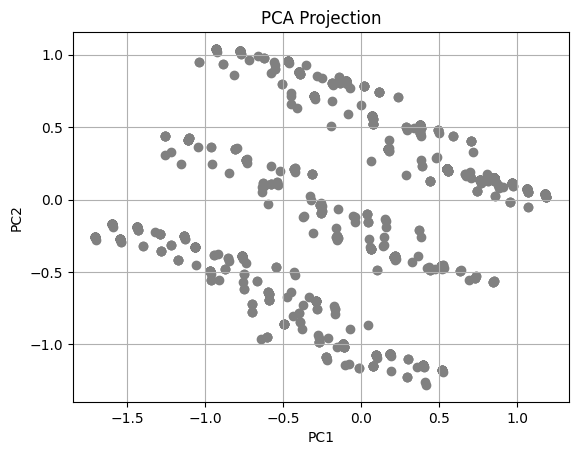

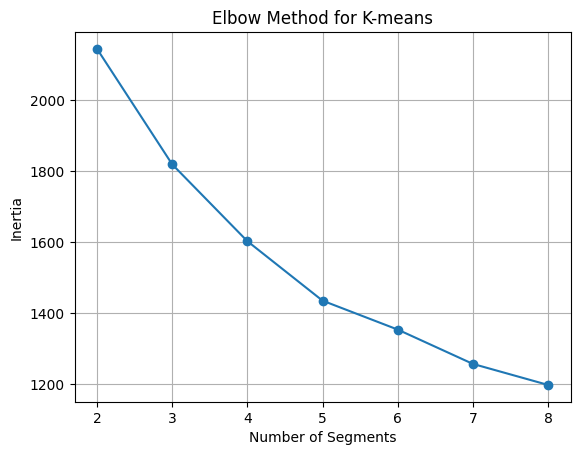

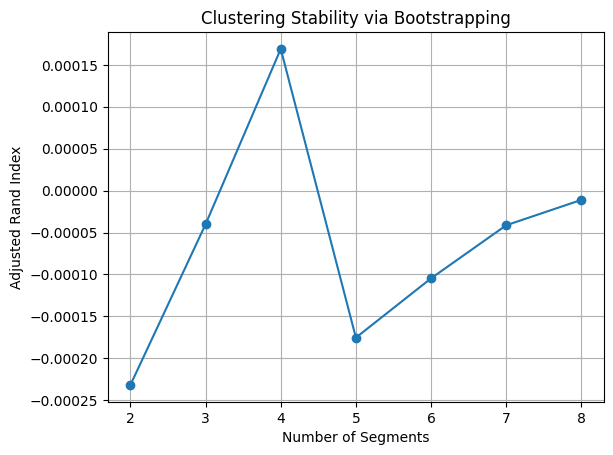

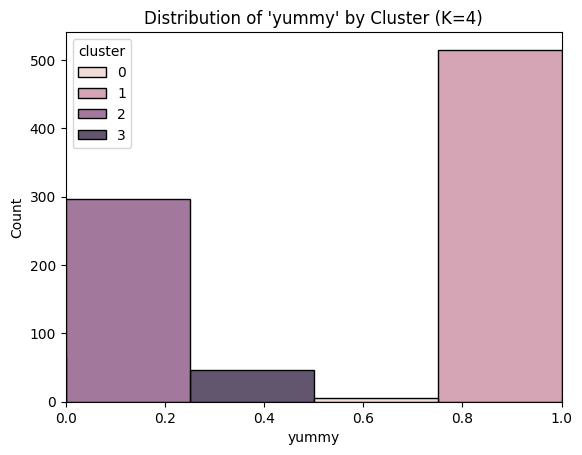

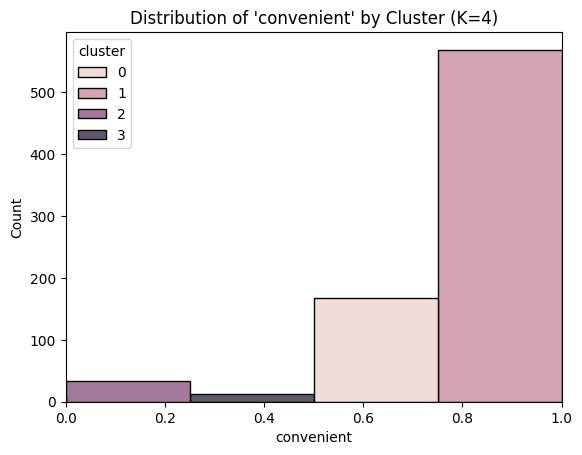

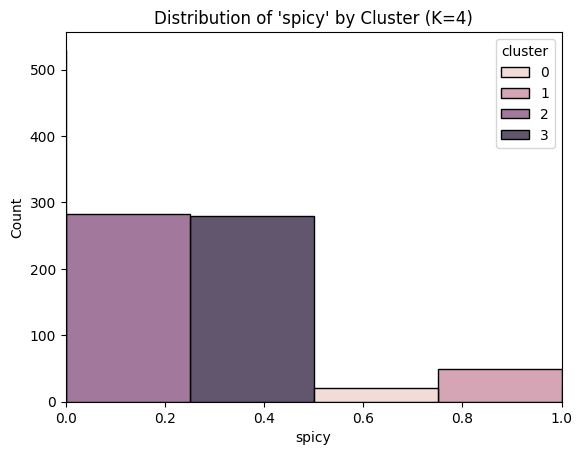

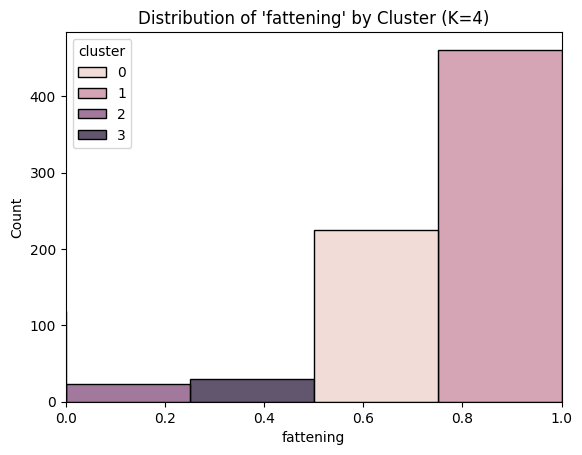

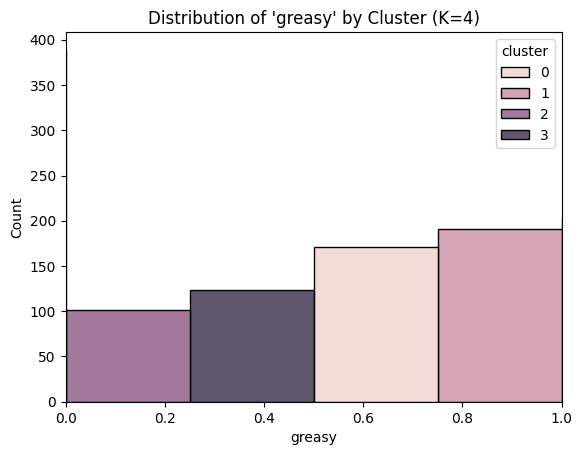

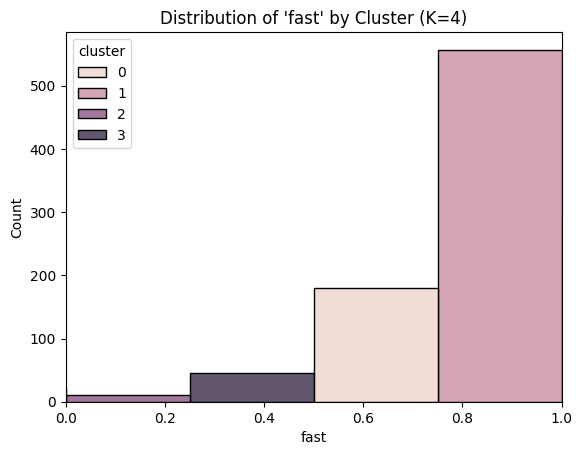

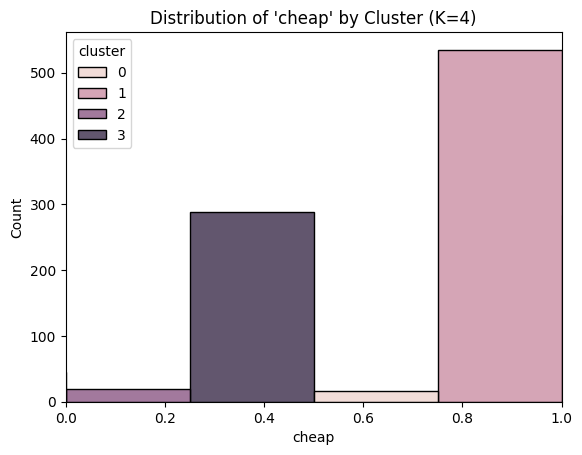

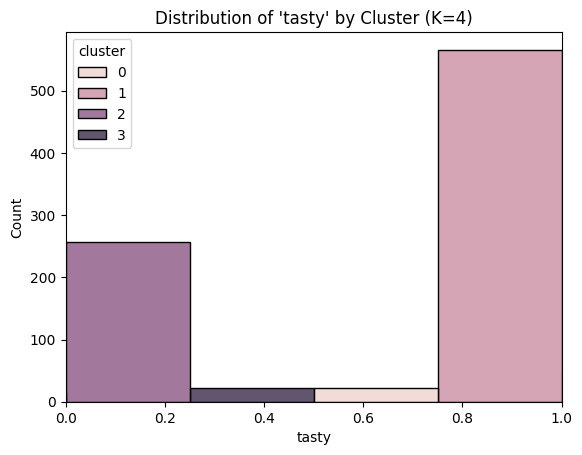

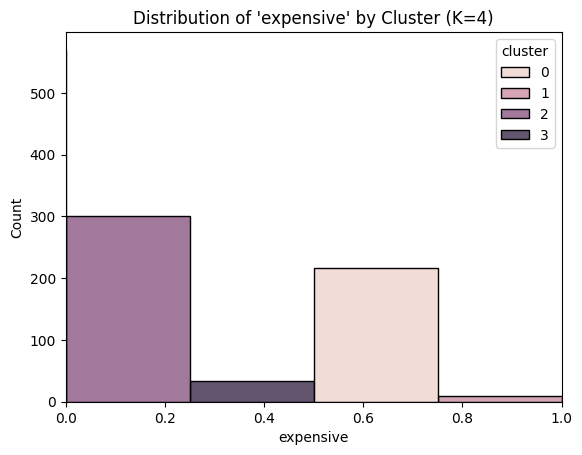

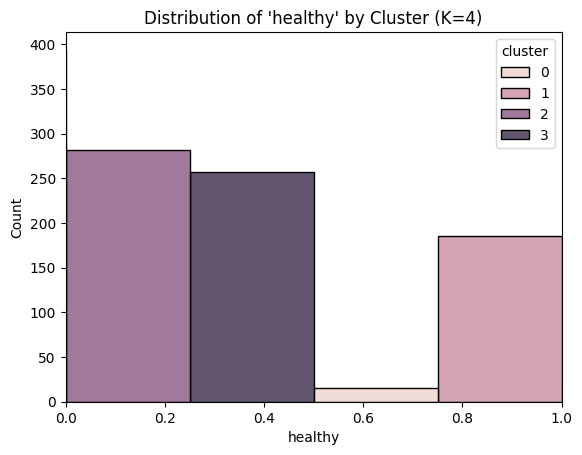

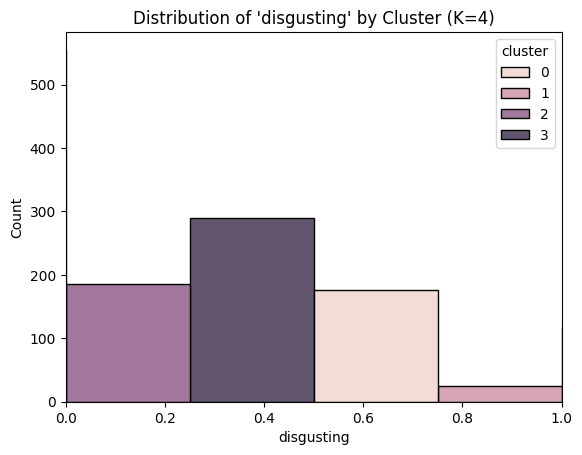

[[  2 212  27   5]
 [546   0   1  33]
 [ 44   4 249   7]
 [ 29  38   0 256]]


In [38]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

mcdonalds_df = pd.read_csv("mcdonalds.csv")
MD_x = mcdonalds_df.iloc[:, :11]
MD_x = (MD_x == "Yes").astype(int)

pca = PCA()
pca.fit(MD_x)
print(pd.DataFrame(pca.components_.round(1), columns=MD_x.columns))
MD_pca_scores = pca.transform(MD_x)

plt.scatter(MD_pca_scores[:, 0], MD_pca_scores[:, 1], color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.grid(True)
plt.show()

np.random.seed(1234)
inertia_values = []
models = {}

for k in range(2, 9):
    best_model = None
    best_inertia = np.inf
    for _ in range(10):
        km = KMeans(n_clusters=k, n_init='auto')
        km.fit(MD_x)
        if km.inertia_ < best_inertia:
            best_inertia = km.inertia_
            best_model = km
    inertia_values.append(best_inertia)
    models[k] = best_model

plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-means")
plt.grid(True)
plt.show()

boot_results = {k: [] for k in range(2, 9)}

for k in range(2, 9):
    original_labels = models[k].labels_
    for _ in range(100):
        X_resampled = resample(MD_x)
        km = KMeans(n_clusters=k, n_init='auto').fit(X_resampled)
        score = adjusted_rand_score(original_labels[:len(km.labels_)], km.labels_)
        boot_results[k].append(score)

ari_means = [np.mean(boot_results[k]) for k in range(2, 9)]

plt.plot(range(2, 9), ari_means, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Stability via Bootstrapping")
plt.grid(True)
plt.show()

k4_model = models[4]
labels_k4 = k4_model.labels_

MD_x['cluster'] = labels_k4
for column in MD_x.columns[:-1]:
    sns.histplot(data=MD_x, x=column, hue='cluster', bins=2, discrete=True, multiple='dodge')
    plt.title(f"Distribution of '{column}' by Cluster (K=4)")
    plt.xlim(0, 1)
    plt.show()

X_bin = MD_x.drop(columns='cluster').values
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(X_bin)
mixture_labels = gmm.predict(X_bin)

conf_mat = confusion_matrix(labels_k4, mixture_labels)
print(conf_mat)


In [39]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

mcdonalds = pd.read_csv("mcdonalds.csv")
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)
n_features = MD_x.shape[1]
n_components = 4

gmm1 = GaussianMixture(n_components=n_components, random_state=1234)
gmm1.fit(MD_x)
loglik1 = gmm1.lower_bound_ * len(MD_x)
df1 = (n_components - 1) + n_components * n_features + n_components * n_features * (n_features + 1) // 2
print(f"'log Lik.' {loglik1:.3f} (df={df1})")

gmm2 = GaussianMixture(n_components=n_components, random_state=1234)
gmm2.fit(MD_x)
loglik2 = gmm2.lower_bound_ * len(MD_x)
df2 = (n_components - 1) + n_components * n_features + n_components * n_features * (n_features + 1) // 2
print(f"'log Lik.' {loglik2:.3f} (df={df2})")

like_counts = mcdonalds['Like'].value_counts(ascending=True)
print("\nCounts of 'Like':\n", like_counts[::-1])

like_mapping = {
    'I hate it!-5': 1,
    '-4': 2,
    '-3': 3,
    '-2': 4,
    '-1': 5,
    '0': 6,
    '+1': 7,
    '+2': 8,
    '+3': 9,
    '+4': 10,
    'I love it!+5': 11
}

mcdonalds['Like.n'] = 6 - mcdonalds['Like'].map(like_mapping)

like_n_table = mcdonalds['Like.n'].value_counts()
print("\nCounts of 'Like.n':\n", like_n_table)

f = 'Like.n ~ Age + VisitFrequency + Gender'
best_ll = -np.inf
best_model = None
for _ in range(10):
    model = smf.glm(f, data=mcdonalds, family=sm.families.Binomial()).fit()
    if model.llf > best_ll:
        best_ll = model.llf
        best_model = model

refit_model = best_model
print("\nSummary of refit model:\n", refit_model.summary())

dist_matrix = pdist(MD_x.T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=MD_x.columns)
plt.title("Hierarchical Clustering of Features")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
labels_k4 = kmeans.labels_

mosaic_data = pd.crosstab(labels_k4, mcdonalds['Like'])
mosaic_data.plot(kind='bar', stacked=True)
plt.xlabel("Segment Number")
plt.ylabel("Count")
plt.title("Mosaic Plot - Like vs Segment")
plt.xticks(rotation=0)
plt.legend(title='Like')
plt.tight_layout()
plt.show()

mosaic_data_gender = pd.crosstab(labels_k4, mcdonalds['Gender'])
mosaic_data_gender.plot(kind='bar', stacked=True)
plt.title("Mosaic Plot - Gender vs Segment")
plt.xlabel("Segment Number")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

le = LabelEncoder()
mcdonalds['Gender_encoded'] = le.fit_transform(mcdonalds['Gender'])
mcdonalds['Segment_3'] = (labels_k4 == 3).astype(int)

tree = DecisionTreeClassifier(random_state=1234)
tree.fit(mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded']], mcdonalds['Segment_3'])

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded'], class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title("Decision Tree for Segment 3")
plt.show()

visit = mcdonalds.groupby(labels_k4)['VisitFrequency'].mean()
print("\nMean VisitFrequency per segment:\n", visit)

like = mcdonalds.groupby(labels_k4)['Like.n'].mean()
print("\nMean Like.n per segment:\n", like)

female = mcdonalds.groupby(labels_k4)['Gender'].apply(lambda x: (x == "Female").mean())
print("\nProportion of Females per segment:\n", female)

plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=100 * female, alpha=0.7)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like.n")
plt.title("Mean Like vs. Visit Frequency by Segment (Size by Female Proportion)")
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(i + 1), fontsize=12, ha='center', va='center')

plt.grid(True)
plt.tight_layout()
plt.show()

'log Lik.' 13740.704 (df=311)
'log Lik.' 13740.704 (df=311)

Counts of 'Like':
 Like
+3              229
+2              187
0               169
+4              160
I hate it!-5    152
+1              152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

Counts of 'Like.n':
 Like.n
-3    229
-2    187
 0    169
-4    160
-1    152
 5    152
-5    143
 3     73
 4     71
 2     59
 1     58
Name: count, dtype: int64


PatsyError: Error evaluating factor: AttributeError: 'Series' object has no attribute 'n'
    Like.n ~ Age + VisitFrequency + Gender
    ^^^^^^

In [40]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

mcdonalds = pd.read_csv("mcdonalds.csv")
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)
n_features = MD_x.shape[1]
n_components = 4

gmm1 = GaussianMixture(n_components=n_components, random_state=1234)
gmm1.fit(MD_x)
loglik1 = gmm1.lower_bound_ * len(MD_x)
df1 = (n_components - 1) + n_components * n_features + n_components * n_features * (n_features + 1) // 2
print(f"'log Lik.' {loglik1:.3f} (df={df1})")

gmm2 = GaussianMixture(n_components=n_components, random_state=1234)
gmm2.fit(MD_x)
loglik2 = gmm2.lower_bound_ * len(MD_x)
df2 = (n_components - 1) + n_components * n_features + n_components * n_features * (n_features + 1) // 2
print(f"'log Lik.' {loglik2:.3f} (df={df2})")

like_counts = mcdonalds['Like'].value_counts(ascending=True)
print("\nCounts of 'Like':\n", like_counts[::-1])

like_mapping = {
    'I hate it!': 1,
    'Dislike it': 2,
    'Neutral': 3,
    'Like it': 4,
    'I love it!!': 5
}
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].map(like_mapping)

like_n_table = mcdonalds['Like.n'].value_counts()
print("\nCounts of 'Like.n':\n", like_n_table)

f = 'Like.n ~ Age + VisitFrequency + Gender'
best_ll = -np.inf
best_model = None
for _ in range(10):
    model = smf.glm(f, data=mcdonalds, family=sm.families.Binomial()).fit()
    if model.llf > best_ll:
        best_ll = model.llf
        best_model = model

refit_model = best_model
print("\nSummary of refit model:\n", refit_model.summary())

dist_matrix = pdist(MD_x.T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=MD_x.columns)
plt.title("Hierarchical Clustering of Features")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
labels_k4 = kmeans.labels_

mosaic_data = pd.crosstab(labels_k4, mcdonalds['Like'])
mosaic_data.plot(kind='bar', stacked=True)
plt.xlabel("Segment Number")
plt.ylabel("Count")
plt.title("Mosaic Plot - Like vs Segment")
plt.xticks(rotation=0)
plt.legend(title='Like')
plt.tight_layout()
plt.show()

mosaic_data_gender = pd.crosstab(labels_k4, mcdonalds['Gender'])
mosaic_data_gender.plot(kind='bar', stacked=True)
plt.title("Mosaic Plot - Gender vs Segment")
plt.xlabel("Segment Number")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

le = LabelEncoder()
mcdonalds['Gender_encoded'] = le.fit_transform(mcdonalds['Gender'])
mcdonalds['Segment_3'] = (labels_k4 == 3).astype(int)

tree = DecisionTreeClassifier(random_state=1234)
tree.fit(mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded']], mcdonalds['Segment_3'])

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded'], class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title("Decision Tree for Segment 3")
plt.show()

visit = mcdonalds.groupby(labels_k4)['VisitFrequency'].mean()
print("\nMean VisitFrequency per segment:\n", visit)

like = mcdonalds.groupby(labels_k4)['Like.n'].mean()
print("\nMean Like.n per segment:\n", like)

# Convert the R code to Python
female = mcdonalds.groupby(labels_k4)['Gender'].apply(lambda x: (x == "Female").mean())
print("\nProportion of Females per segment:\n", female)

plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=100 * female, alpha=0.7) # Use area proportional to female proportion
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like.n")
plt.title("Mean Like vs. Visit Frequency by Segment (Size by Female Proportion)")
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(i + 1), fontsize=12, ha='center', va='center')

plt.grid(True)
plt.tight_layout()
plt.show()

'log Lik.' 13740.704 (df=311)
'log Lik.' 13740.704 (df=311)

Counts of 'Like':
 Like
+3              229
+2              187
0               169
+4              160
I hate it!-5    152
+1              152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

Counts of 'Like.n':
 Series([], Name: count, dtype: int64)


PatsyError: Error evaluating factor: AttributeError: 'Series' object has no attribute 'n'
    Like.n ~ Age + VisitFrequency + Gender
    ^^^^^^